In [ ]:
!pip install python-mnist
!pip install keras

In [ ]:
import tensorflow as tf
from tensorflow.python.client import device_lib

tf.test.gpu_device_name()
device_lib.list_local_devices()
# !cat /proc/meminfo

In [47]:
'''
21/09/2020
practice for project  - digit_recognition

NOTE How to use shape method 
numpy.array可使用 shape。list不能使用shape。
可以使用np.array(list A)进行转换。

NOTE Ref
#1 https://nextjournal.com/gkoehler/digit-recognition-with-keras
#2 https://www.sitepoint.com/keras-digit-recognition-tutorial/

'''

import os
import gzip
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
from tensorflow import keras
from mnist import MNIST
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.models import load_model


# Loading train and test data
mndata = MNIST('drive/My Drive/Colab Notebooks/mnist')
x_train, y_train = mndata.load_training()
x_test, y_test   = mndata.load_testing()
x_train = np.array(x_train).astype('float32')/255.0
x_test = np.array(x_test).astype('float32')/255.0

x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)
print(x_train.shape)
print(x_test.shape)

y_train = np_utils.to_categorical(y_train, 10)
y_test  = np_utils.to_categorical(y_test, 10)

# Variables
batch_size = 128
num_classes = 10
epochs = 10


# Setup model
model = keras.Sequential()
model.add(keras.layers.Conv2D(16, kernel_size=(3,3), activation='relu',input_shape=(28,28,1)))
model.add(keras.layers.Conv2D(32, kernel_size=(5,5), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(num_classes, activation='softmax'))
model.summary()

(60000, 28, 28, 1)
(10000, 28, 28, 1)
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 22, 22, 32)        12832     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 11, 11, 32)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 3872)              0         
_________________________________________________________________
dropout_19 (Dropout)         (None, 3872)              0         
_________________________________________________________________
dense_12 (Dense)

In [43]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=2, validation_data=(x_test,y_test))

# saving the model
save_dir = 'drive/My Drive/Colab Notebooks'
model_name = 'keras_mnist.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

Epoch 1/10
469/469 - 3s - loss: 0.3027 - accuracy: 0.9045 - val_loss: 0.0622 - val_accuracy: 0.9808
Epoch 2/10
469/469 - 2s - loss: 0.1121 - accuracy: 0.9659 - val_loss: 0.0423 - val_accuracy: 0.9862
Epoch 3/10
469/469 - 2s - loss: 0.0860 - accuracy: 0.9739 - val_loss: 0.0357 - val_accuracy: 0.9883
Epoch 4/10
469/469 - 2s - loss: 0.0765 - accuracy: 0.9763 - val_loss: 0.0309 - val_accuracy: 0.9896
Epoch 5/10
469/469 - 2s - loss: 0.0674 - accuracy: 0.9800 - val_loss: 0.0278 - val_accuracy: 0.9899
Epoch 6/10
469/469 - 2s - loss: 0.0605 - accuracy: 0.9821 - val_loss: 0.0284 - val_accuracy: 0.9898
Epoch 7/10
469/469 - 2s - loss: 0.0577 - accuracy: 0.9822 - val_loss: 0.0279 - val_accuracy: 0.9904
Epoch 8/10
469/469 - 2s - loss: 0.0548 - accuracy: 0.9826 - val_loss: 0.0225 - val_accuracy: 0.9922
Epoch 9/10
469/469 - 2s - loss: 0.0487 - accuracy: 0.9846 - val_loss: 0.0241 - val_accuracy: 0.9920
Epoch 10/10
469/469 - 2s - loss: 0.0495 - accuracy: 0.9846 - val_loss: 0.0247 - val_accuracy: 0.9918

In [44]:
model = load_model("drive/My Drive/Colab Notebooks/keras_mnist.h5")
test_loss, test_acc = model.evaluate(x_test,np.array(y_test))
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0247 - accuracy: 0.9918
Test accuracy: 0.9918000102043152


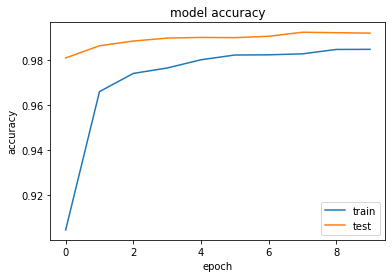

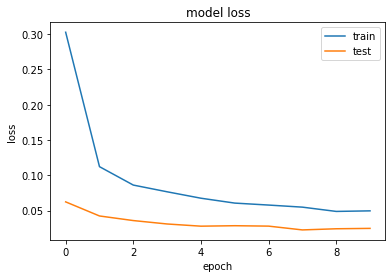

In [45]:
# Plotting the metrics
fig = plt.figure()
#plt.subplot(2,1,1)
plt.plot()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

#plt.subplot(2,1,2)
plt.plot()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

(10000, 28, 28, 1)


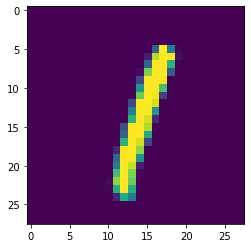

The predict output is: [1]


In [46]:
from random import randint
# Predict 
print(x_test.shape)
index = randint(1,10)
plt.imshow(x_test[index].squeeze())
plt.show()

pred = model.predict_classes(x_test[index].reshape(1,28,28,1))
print("The predict output is:",pred)